<a href="https://colab.research.google.com/github/yoadeoye/Employee-Attrition/blob/main/Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


**Employee Attrition**

The data is for company X which is trying to control attrition. There are two sets of data: "Existing employees" and "Employees who have left". Following attributes are available for every employee.
Satisfaction Level : 
Last evaluation :
Number of projects :
Average monthly hours :
Time spent at the company
Whether they have had a work accident
Whether they have had a promotion in the last 5 years
Departments (column sales)
Salary
Whether the employee has left


**Objective**
What type of employees are leaving? Determine which employees are prone to leave next.

**WHAT CAN ACTUALLY CAUSE AN EMPLOYEE TO QUIT A JOB**
1.   Low Salary
2.   High monthly working hours
3.   Long Time spent at the company
4.   Whether they have had a promotion in the last 5 years
5.   Satisfaction Level
6.   Last Evaluation








In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

#import the csv file from drive
existingEmployees=pd.read_csv('/content/gdrive/MyDrive/Existing_employees.csv')
employeesLeft=pd.read_csv('/content/gdrive/MyDrive/Employees who have left.csv')
existingEmployees.head(2)

Populating the interactive namespace from numpy and matplotlib


Emp ID  satisfaction_level  ...   dept  salary
0    2001                0.58  ...  sales     low
1    2002                0.82  ...  sales     low

[2 rows x 10 columns]

In [ ]:
employeesLeft.head(2)

Emp ID  satisfaction_level  ...   dept  salary
0       1                0.38  ...  sales     low
1       2                0.80  ...  sales  medium

[2 rows x 10 columns]

 Exploratory Data Analysis

In [ ]:
[existingEmployees.shape,employeesLeft.shape] #get no of rows/columns in each dataset

[(11428, 10), (3571, 10)]

In [ ]:
#checking the department data for each of the dataset
employeesLeft['dept'].value_counts(),existingEmployees['dept'].value_counts()

(sales          1014
 technical       697
 support         555
 IT              273
 hr              215
 accounting      204
 marketing       203
 product_mng     198
 RandD           121
 management       91
 Name: dept, dtype: int64, sales          3126
 technical      2023
 support        1674
 IT              954
 product_mng     704
 RandD           666
 marketing       655
 accounting      563
 management      539
 hr              524
 Name: dept, dtype: int64)

In [ ]:
employeesLeft['dept'].replace('RandD','Others_Dept',inplace=True)  #changes the rand Dept to Others
existingEmployees['dept'].replace('RandD','Others_Dept',inplace=True)

In [ ]:
employeesLeft.head(2)

Emp ID  satisfaction_level  ...   dept  salary
0       1                0.38  ...  sales     low
1       2                0.80  ...  sales  medium

[2 rows x 10 columns]

In [ ]:
print("""
EXISTING EMPLOYEES INFO
""")
existingEmployees.info()
print("""
EMPLOYEES LEFT ALREADY
""")
employeesLeft.info()   


EXISTING EMPLOYEES INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11428 entries, 0 to 11427
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 11428 non-null  int64  
 1   satisfaction_level     11428 non-null  float64
 2   last_evaluation        11428 non-null  float64
 3   number_project         11428 non-null  int64  
 4   average_montly_hours   11428 non-null  int64  
 5   time_spend_company     11428 non-null  int64  
 6   Work_accident          11428 non-null  int64  
 7   promotion_last_5years  11428 non-null  int64  
 8   dept                   11428 non-null  object 
 9   salary                 11428 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 892.9+ KB

EMPLOYEES LEFT ALREADY

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 10 columns):
 #   Column                 Non-Null Count  D

### IMPLEMENTATION OF AUTO EDA

In here, pandas profiling library will be installed and used 
to get a quick insight of all it is  entailed in *employeesLeft* Dataset

In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
# #Generating report on the employeesLeft Dataset
# # check the python for this library as it only works in python >>3.70
# # to check print(python --version)
import pandas_profiling
empLeftReport=pandas_profiling.ProfileReport(employeesLeft)

In [ ]:
print("""
EMPLOYEES LEFT ALREADY
""")
empLeftReport


EMPLOYEES LEFT ALREADY



Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

INSIGHTS GENERATED FROM PANDAS PROFILING REPORT OF EMPLOYEES LEFT
1. **Numerical Variables:**

  satisfaction_level, last_evaluation
  number_project, average_montly_hours, Emp ID
  		

2. **Categorical Variables:**

  Work_accident, dept,
  promotion_last_5years, salary,
  time_spend_company






In [ ]:
#Data Familirization with employeesLeft Dataset
employeesLeft.isnull().any().any() #no null values
employeesLeft.duplicated==False #??? #False:we have no duplicated values


False

In [ ]:
employeesLeft.drop('Emp ID',axis=1,inplace=True) # drops the Emp ID being a unique numerical variable

In [ ]:
employeesLeft.head(2)

satisfaction_level  last_evaluation  ...   dept  salary
0                0.38             0.53  ...  sales     low
1                0.80             0.86  ...  sales  medium

[2 rows x 9 columns]

In [ ]:
#changing the data types of the columns --cat and --int
numV=['satisfaction_level','last_evaluation','number_project','average_montly_hours'] #all in int/float datatype
catV=['Work_accident','dept','promotion_last_5years','salary', 'time_spend_company']
for i in catV:
  employeesLeft[i]=employeesLeft[i].astype('category')

In [ ]:
 #separating our categorical and numerical data for calling
 cat_data=list(employeesLeft.select_dtypes(include=['category']).columns)
 num_data=list(employeesLeft.select_dtypes(include=['int','float']).columns)

VISUALIZATION OF THE DISTRIBUTION OF CATEGORICAL COLUMN DATA 
INSIGHTS
for column:time_spend_company in employeesLeft : 1586 for cat: 3  is the highest that have  left the company
for column:Work_accident in employeesLeft : 3402 for cat: 0  is the highest that have  left the company
for column:promotion_last_5years in employeesLeft : 3552 for cat: 0  is the highest that have  left the company
for column:dept in employeesLeft : 1014 for cat: sales  is the highest that have  left the company
for column:salary in employeesLeft : 2172 for cat: low  is the highest that have  left the company


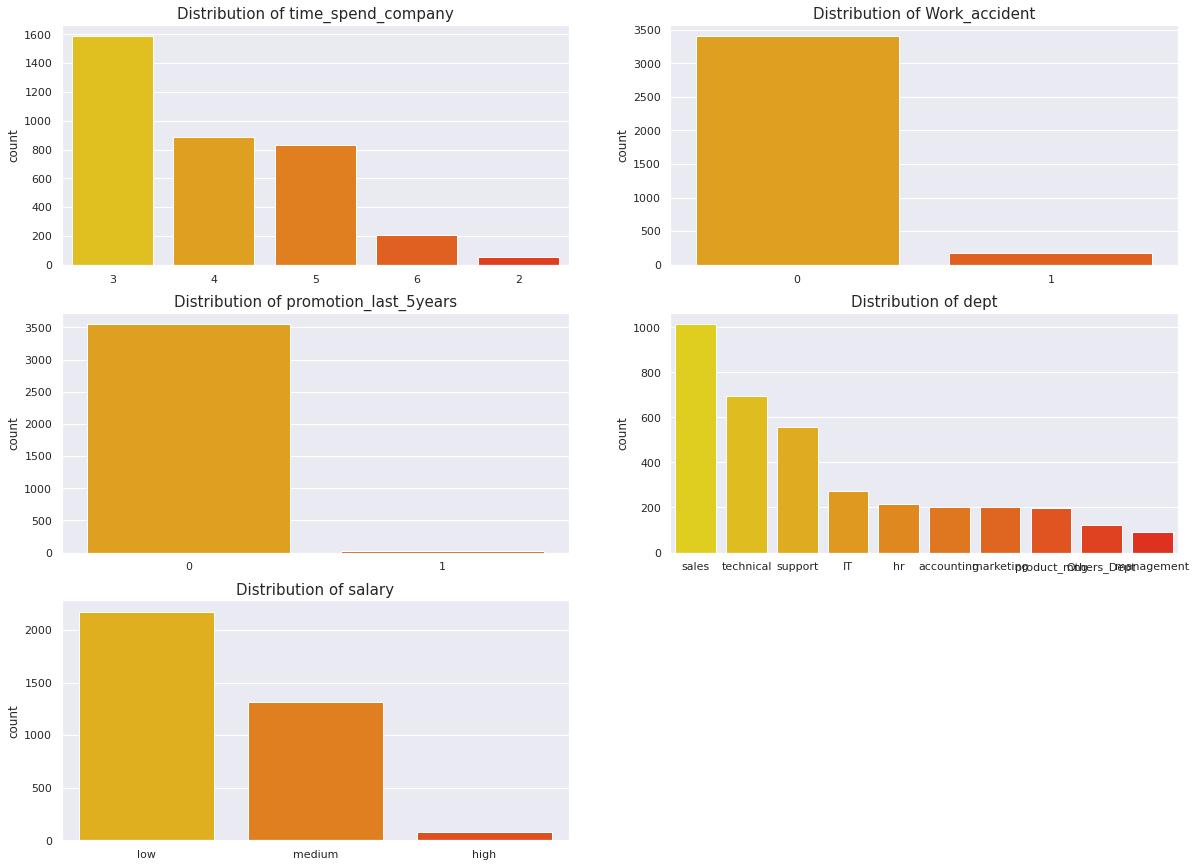

In [ ]:
#Visualization of The NUmerical and Categorical,data
print('visualization of the Distribution of categorical column data'.upper(),'\nINSIGHTs'.upper())
sns.set()
plt.figure(1,(20,15))
for i,dat in enumerate(employeesLeft[cat_data].columns):
  ax=plt.subplot(3,2,i+1)
  sns.countplot(x=employeesLeft[dat],order=employeesLeft[dat].value_counts().index,palette='autumn_r',orient='horizontal')
  ax.set_xlabel(None)
  ax.set_title(f'Distribution of {dat}',fontsize=15)
  x=employeesLeft[dat].value_counts()
  order=employeesLeft[dat].value_counts().index
  print(f'for column:{dat} in employeesLeft : {max(x)} for cat: {order[0]}\
  is the highest that have\
  left the company')
  plt.tight_layout
plt.show()


## **INSIGHTS**
### *With reference or benchmarking  with report generated from pandas profiling*

1.   ~93 % of the employees that have left have spent 3-5 years and above in the company
2.  ~95 % of the employees Left have had Work Accident
3.   99.47 % of the employees left have not had promotion in the last 5yrs
4.   ~60% of them earned low Salary, ~ 37% earned medium salary whilst few 2% earning high income also left.
5.   Averagely >60% of  employees have left from the department of Sales,Technical,Support,IT and HR department.

--- VISUALIZATION OF THE DISTRIBUTION OF CATEGORICAL COLUMN DATA 
### **INSIGHTS**
*   for column:**time_spend_company** in **employeesLeft** 1586 for cat: 3  is the highest that have  left the company
*   for column:**Work_accident** in **employeesLeft** : 3402 for cat: 0  is the highest that have  left the company
*   for column:**promotion_last_5years** in **employeesLeft** : 3552 for cat: 0  is the highest that have  left the company
*   for column:**Department** in **employeesLeft** : 1014 for cat: sales  is the highest that have  left the company
*   for column:**salary** in **employeesLeft** : 2172 for cat: low  is the highest that 
have  left the company

VISUALIZATION OF THE DISTRIBUTION OF NUMERICAL COLUMN DATA


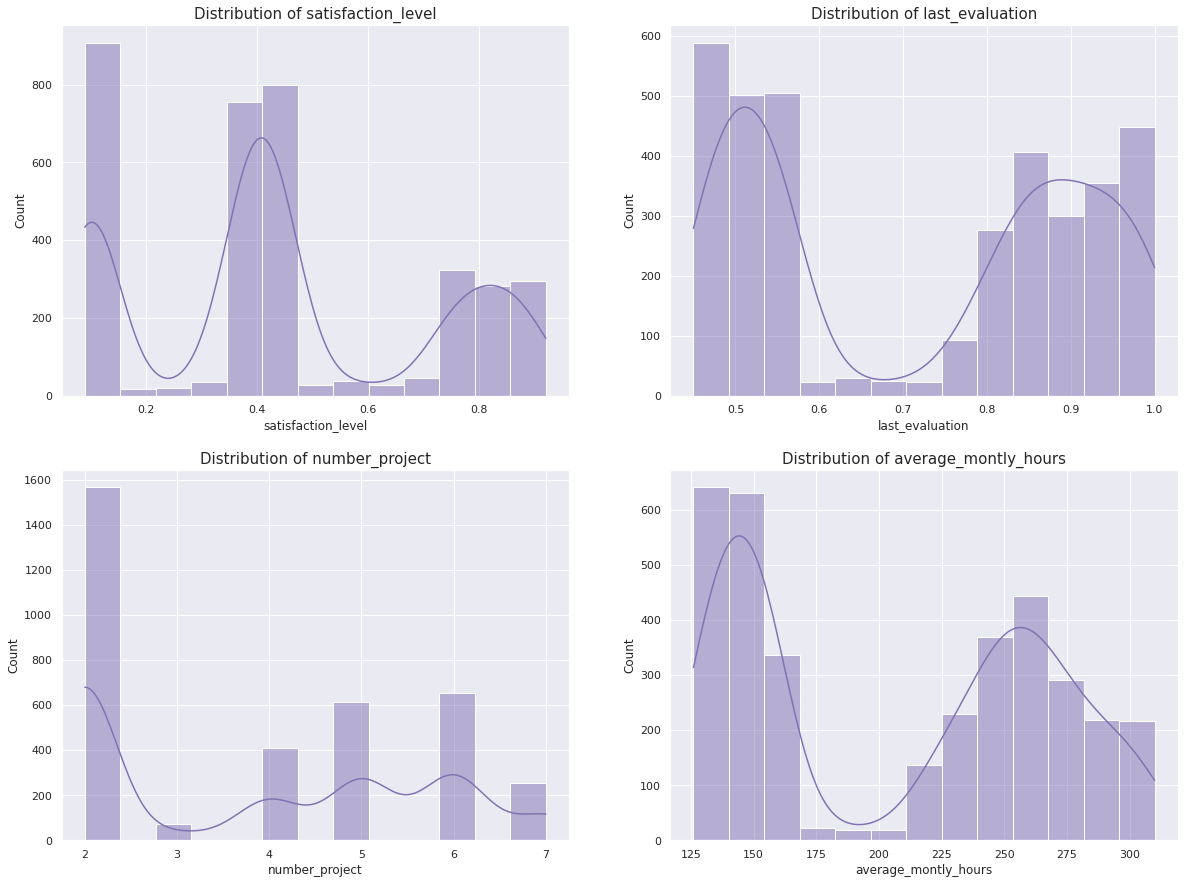

In [ ]:
print('visualization of the Distribution of Numerical column data'.upper())

plt.figure(figsize=[20,15])
for i,num in enumerate(employeesLeft[num_data].columns):
  ax=plt.subplot(2,2,i+1)
  sns.histplot(employeesLeft[num],color='m',kde=True)
  ax.set_title(f'Distribution of {num}',fontsize=15)
  plt.tight_layout
plt.show()

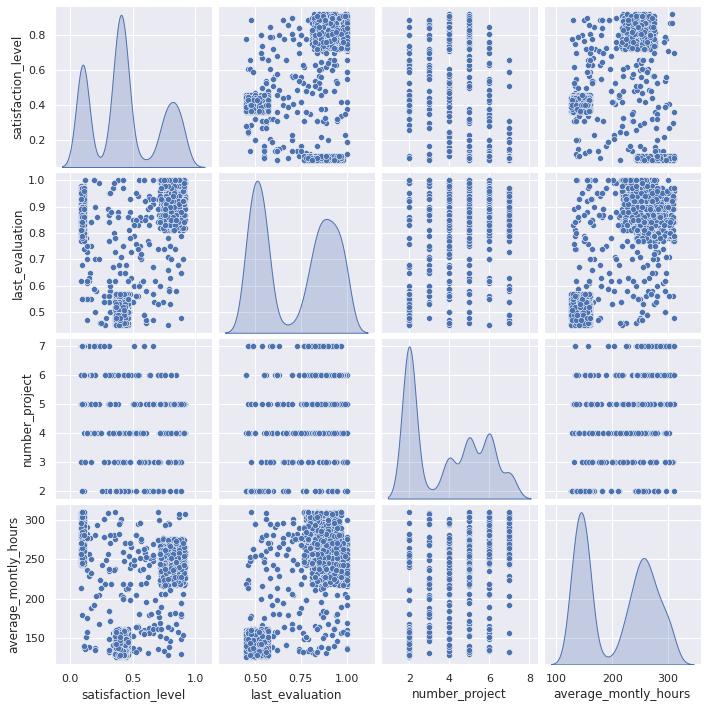

In [ ]:
sns.set
sns.pairplot(data=employeesLeft,diag_kind='kde',kind='scatter',palette='husl')
sns.set_style('ticks')
plt.show()

INSIGHTS

1.  Workers with Average monthly hours tend to have achieved the highest number of project.
2.   Employees with more average monthly working hours tend to have the highest evaluation
3. The relationship between monhly hours is not consistently linear with satisfaction 
4. last evaluation of employees tend to have a high correlation with other numerical variable.
5. Employees with satisfaction level of 0.1 left the most



INFERENCE : The Evaluation of an employee is dependent on the satisfaction level,No of project,average monthly working hours.
y=f(a,b,c)

######Establishing the relationship between the numerical variables and using the categorical variable 

DISTRIBUTION OF THE SATIFACTION LEVEL.
358 Float64Index([ 0.1, 0.11, 0.09, 0.37, 0.43,  0.4, 0.45, 0.38, 0.44, 0.39, 0.41,
              0.42, 0.36, 0.46, 0.84, 0.82, 0.87, 0.89,  0.9, 0.81, 0.77, 0.74,
              0.78, 0.83, 0.79, 0.76, 0.91, 0.73, 0.86, 0.75, 0.85, 0.72,  0.8,
              0.88, 0.92, 0.31, 0.66,  0.7, 0.48, 0.14, 0.53, 0.57, 0.32, 0.59,
              0.19, 0.61, 0.54, 0.27, 0.17, 0.51, 0.56,  0.6, 0.55, 0.63, 0.12,
              0.71, 0.47,  0.2, 0.34, 0.13, 0.28,  0.5, 0.25, 0.24, 0.15, 0.58,
              0.33, 0.35, 0.64, 0.23, 0.62,  0.3, 0.49, 0.65, 0.16, 0.22, 0.26,
              0.67, 0.68, 0.29, 0.21],
             dtype='float64')


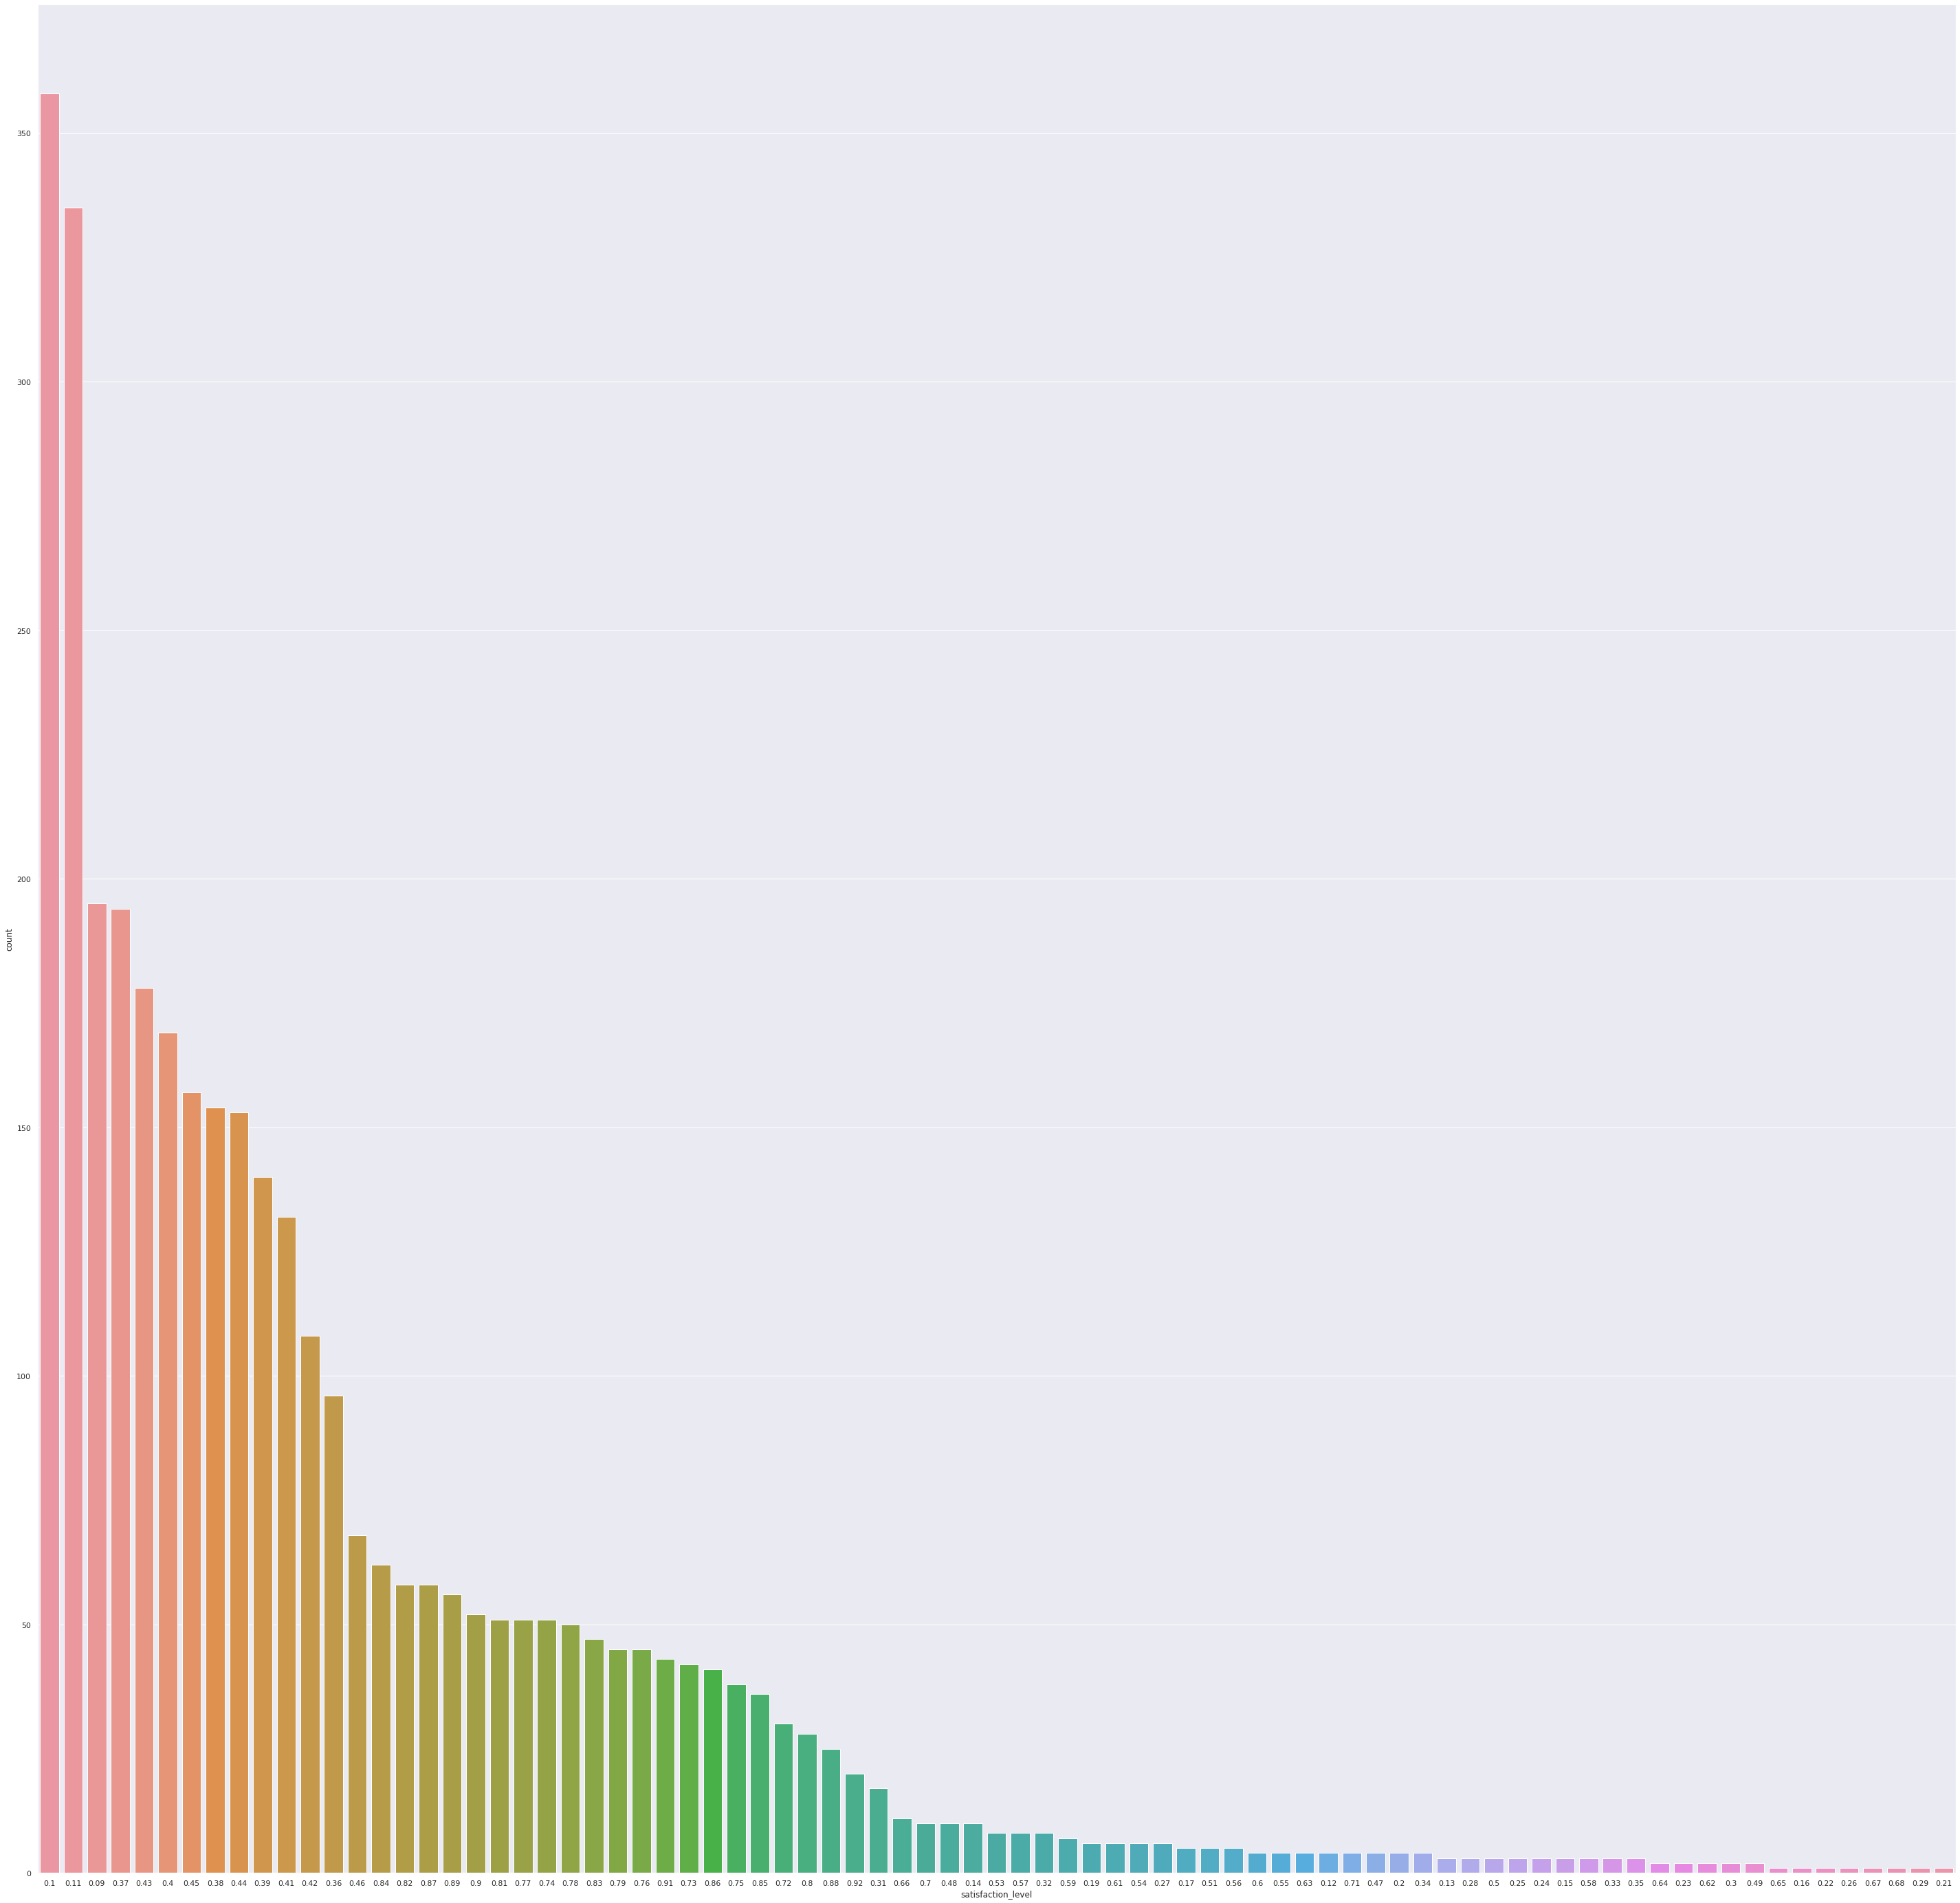

In [ ]:
print('Distribution of the Satifaction level.'.upper())
plt.figure(figsize=[50,50])
sns.set()
sns.countplot(x=employeesLeft['satisfaction_level'],order=employeesLeft['satisfaction_level'].value_counts().index,data=employeesLeft)
a=max(employeesLeft['satisfaction_level'].value_counts())
b=employeesLeft['satisfaction_level'].value_counts().index
print(a,b,end='\n')

DISTRIBUTION OF THE SATIFACTION LEVEL.
167 Float64Index([ 1.0, 0.46, 0.54,  0.5, 0.48, 0.87, 0.51, 0.56, 0.57, 0.53, 0.52,
              0.49, 0.47, 0.55, 0.84, 0.92, 0.85, 0.93, 0.83, 0.89, 0.97,  0.9,
              0.94, 0.95, 0.86, 0.91, 0.96, 0.99, 0.45, 0.98, 0.88,  0.8, 0.81,
              0.82, 0.77, 0.79, 0.78, 0.62,  0.7, 0.75, 0.74, 0.58, 0.71,  0.6,
              0.68, 0.65, 0.59, 0.67, 0.73, 0.63, 0.72, 0.76, 0.61, 0.66],
             dtype='float64')


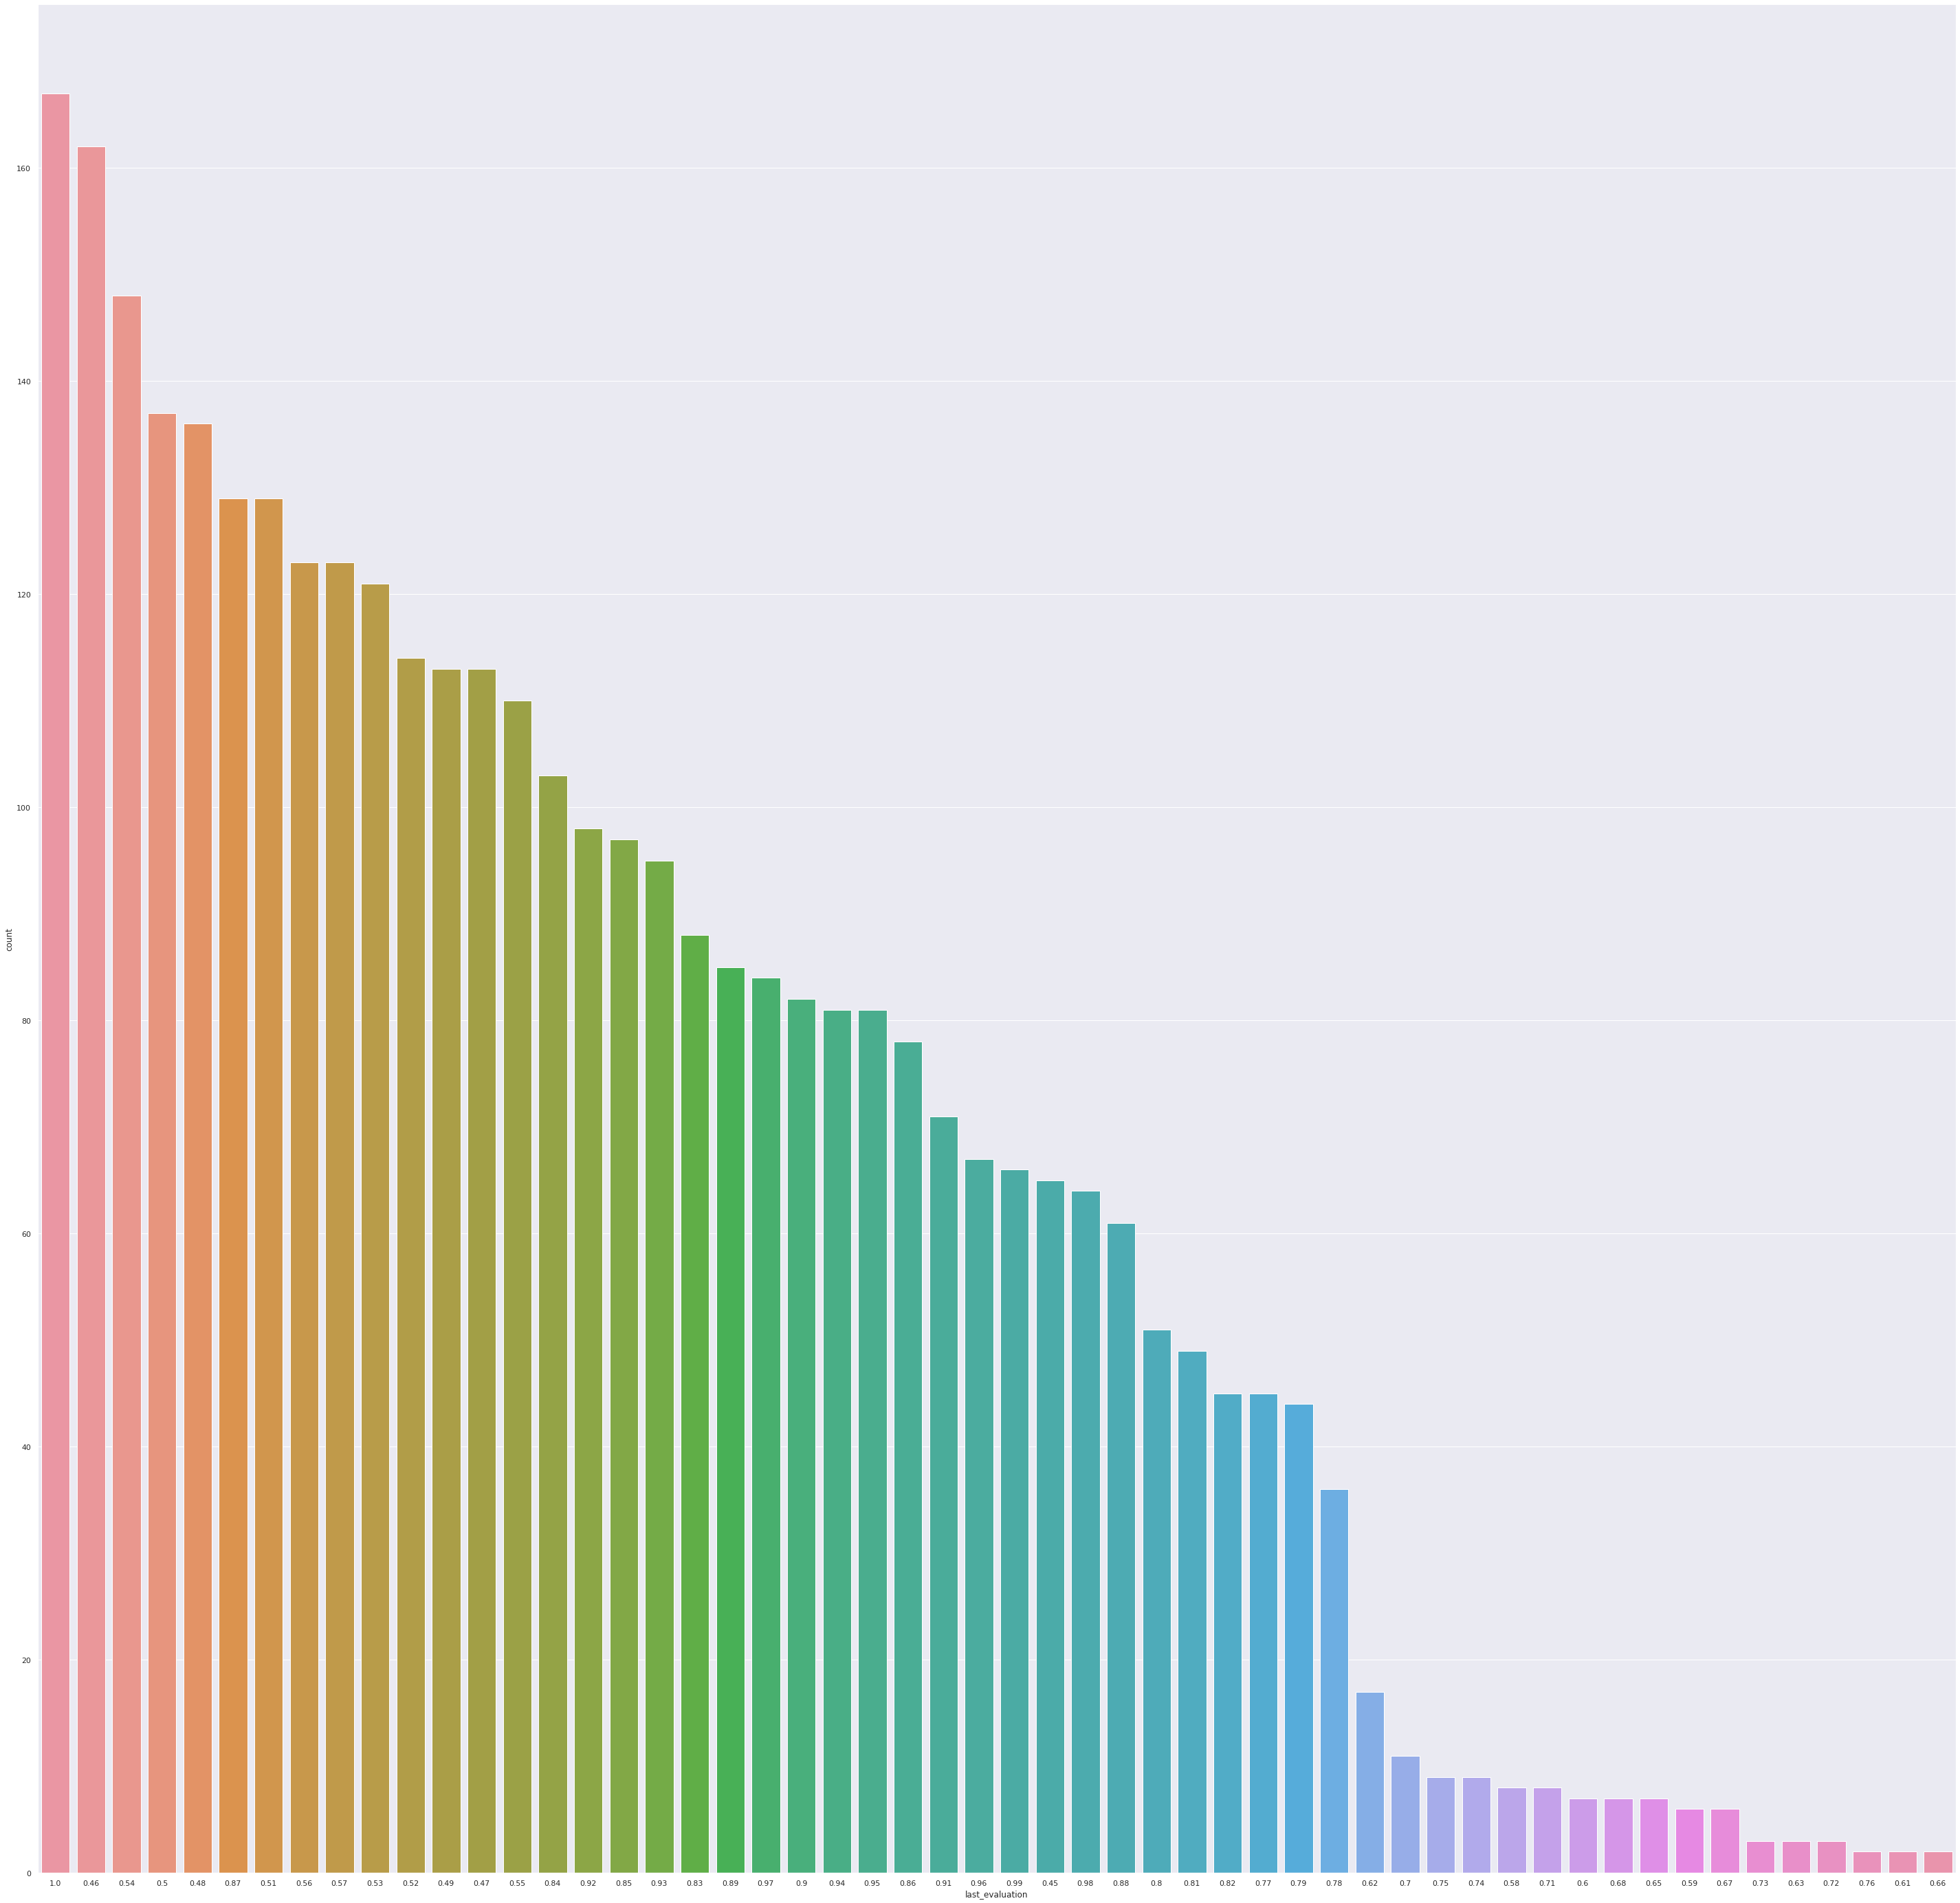

In [ ]:
print('Distribution of the Satifaction level.'.upper())
plt.figure(figsize=[50,50])
sns.set()
sns.countplot(x=employeesLeft['last_evaluation'],order=employeesLeft['last_evaluation'].value_counts().index,data=employeesLeft)
a=max(employeesLeft['last_evaluation'].value_counts())
b=employeesLeft['last_evaluation'].value_counts().index
print(a,b,end='\n')

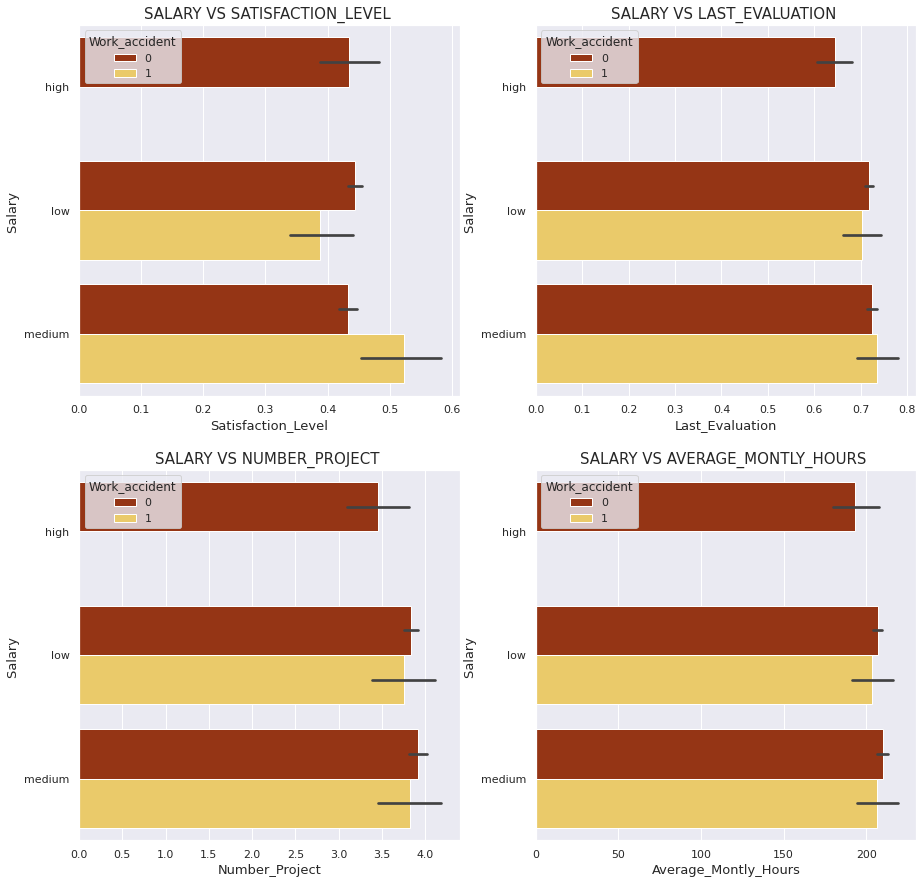

In [ ]:
#  variation of Salary with each numerical variable with whether they have had Work_accident' determinant
plt.figure(1,(15,15))
sns.set()
num_data
for i in range(len(num_data)):
  ax=plt.subplot(2,2,i+1)
  sns.barplot(x=employeesLeft[num_data[i]],y=employeesLeft['salary'],hue=employeesLeft['Work_accident'],palette='afmhot')
  ax.set_title(f'Salary Vs {num_data[i]} '.upper(),fontsize=15,loc='center')
  ax.set_ylabel('Salary ',fontsize=13)
  ax.set_xlabel(f'{num_data[i]}'.title(),fontsize=13)
  plt.tight_layout
plt.show()

### INSIGHTS
1. High salary earners amongst the employees that have left tend to have zero work accidents.

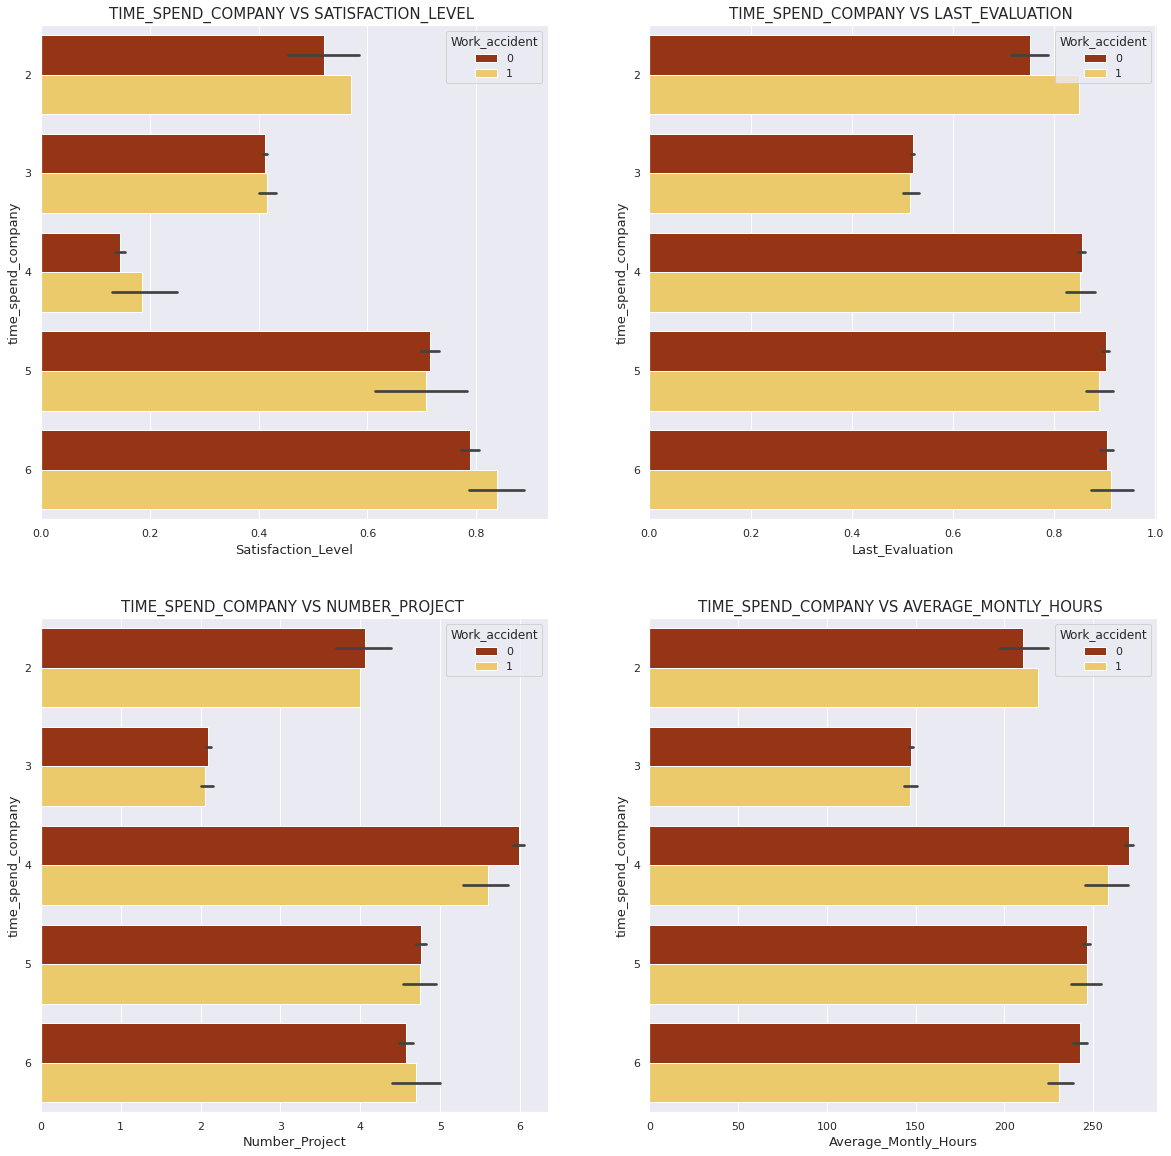

In [ ]:
# variation of time_spend_company with each numerical variable with whether they have had Work_accident' determinant
plt.figure(1,(20,20))
sns.set()
for i in range(len(num_data)):
  ax=plt.subplot(2,2,i+1)
  sns.barplot(x=employeesLeft[num_data[i]],y=employeesLeft['time_spend_company'],hue=employeesLeft['Work_accident'],palette='afmhot')
  ax.set_title(f'time_spend_company Vs {num_data[i]} '.upper(),fontsize=15,loc='center')
  ax.set_ylabel('time_spend_company',fontsize=13)
  ax.set_xlabel(f'{num_data[i]}'.title(),fontsize=13)
  plt.tight_layout
plt.show()

1. Employees with highest satisfaction & evaluation level tend to have experience more accidents and have spent more years in the company
2. Employees with 4yrs experience tend to have had the higheest no of project/monthly hours and have recorded more work accidents

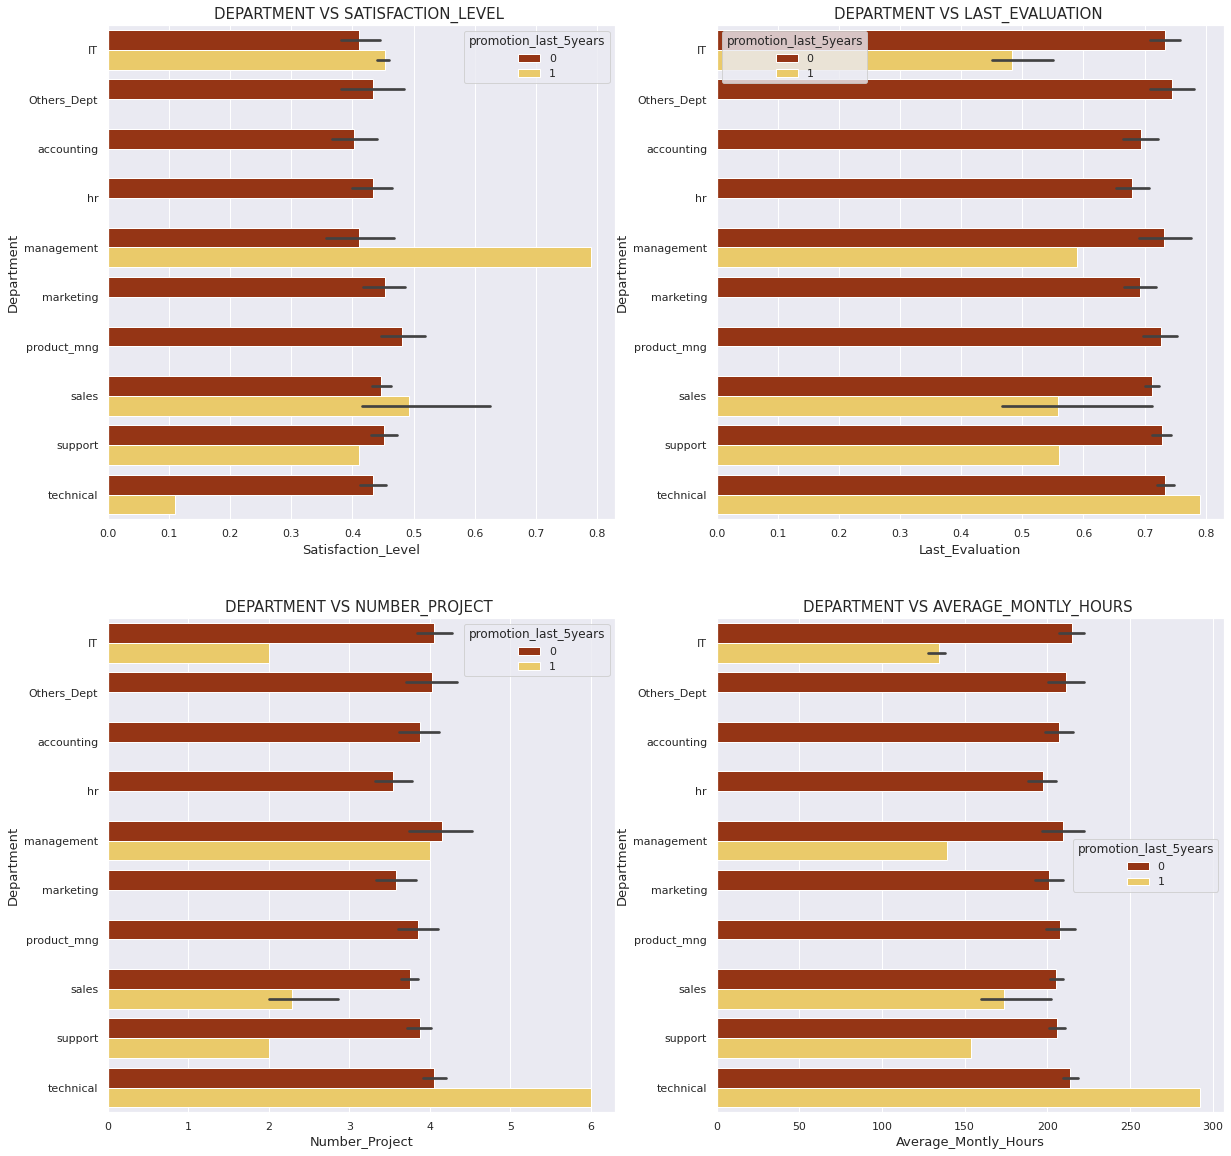

In [ ]:

# variation of department with each numerical variable with whether they have had promotion_last_5years' determinant
plt.figure(1,(20,20))
sns.set()
for i in range(len(num_data)):
  ax=plt.subplot(2,2,i+1)
  sns.barplot(x=employeesLeft[num_data[i]],y=employeesLeft['dept'],hue=employeesLeft['promotion_last_5years'],palette='afmhot')
  ax.set_title(f'Department Vs {num_data[i]} '.upper(),fontsize=15,loc='center')
  ax.set_ylabel('Department',fontsize=13)
  ax.set_xlabel(f'{num_data[i]}'.title(),fontsize=13)
  plt.tight_layout
plt.show()

INSIGHTS
1.   Employees from Management have highest satisfaction level and have experienced more promotions in the last 5years
2.  Accounting,HR, product.Mgt, marketing have never had promotion in the last 5 years
3.Technical department have achieved the highest kpi e.g No of project/Av.Monthly hours



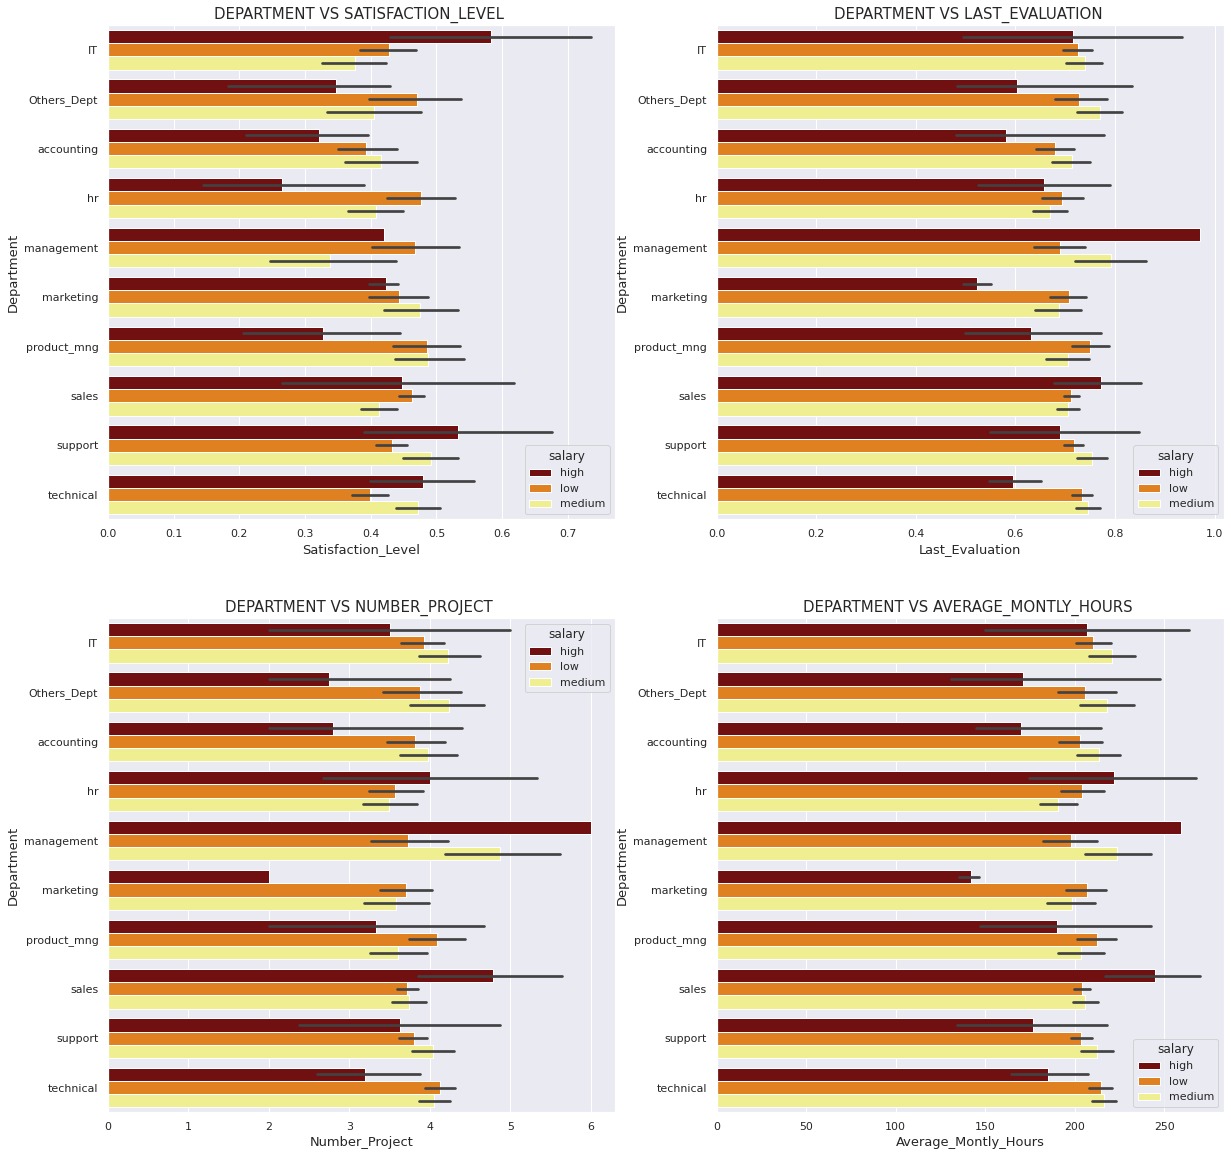

In [ ]:
# variation of department with each numerical variable with salary determinant
plt.figure(figsize=[20,20])
sns.set()
for i in range(len(num_data)):
  ax=plt.subplot(2,2,i+1)
  sns.barplot(x=employeesLeft[num_data[i]],y=employeesLeft['dept'],hue=employeesLeft['salary'],palette='afmhot')
  ax.set_title(f'Department Vs {num_data[i]} '.upper(),fontsize=15,loc='center')
  ax.set_ylabel('Department',fontsize=13)
  ax.set_xlabel(f'{num_data[i]}'.title(),fontsize=13)
  plt.tight_layout
plt.show()

The evaluation of an employee is based on the No of projects,avg monthly hours
Therefore employees like the Management with high evaluation tend to have the highest salary

### ANALYSIS OF THE EXISTING EMPLOYEES DATA SET FOR QUICK REVIEW
*  Using Auto EDA library as sweetviz

In [ ]:
!pip install sweetviz  #installing sweetviz

     |████████████████████████████████| 15.1 MB 180 kB/s 


In [ ]:
existingEmployees.drop(columns='Emp ID',axis=1,inplace=True) # dropping the employee ID

In [ ]:
#generating quick report using sweetviz
# functions - analyze(),compare_intra(),compare()
import sweetviz as sv
exEmployeeReport=sv.analyze(existingEmployees)
exEmployeeReport.show_html('existing_Employees.html')

                                             |          | [  0%]   00:00 -> (? left)

Report existing_Employees.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
# overview of the existing employee dataset using pandas profiling 
import pandas_profiling
exEmployeeReport1=pandas_profiling.ProfileReport(existingEmployees)
exEmployeeReport1

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Conclusion from the Employees That Have Left**
### Employees with higher concentration in a particular column of the employeesLeft are prone to quit the job when compared with existingEmployees data




In [ ]:
existingEmployees.head(2)

satisfaction_level  last_evaluation  ...   dept  salary
0                0.58             0.74  ...  sales     low
1                0.82             0.67  ...  sales     low

[2 rows x 9 columns]

In [ ]:
#dropping te duplicated rows
existingEmployees.drop_duplicates(inplace=True)

In [ ]:
all(existingEmployees.duplicated())==False # checking if all duplicated values have been removed

True

In [ ]:
# existingEmployees.drop('Emp ID',axis=1,inplace=True)
existingEmployees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     10000 non-null  float64
 1   last_evaluation        10000 non-null  float64
 2   number_project         10000 non-null  int64  
 3   average_montly_hours   10000 non-null  int64  
 4   time_spend_company     10000 non-null  int64  
 5   Work_accident          10000 non-null  int64  
 6   promotion_last_5years  10000 non-null  int64  
 7   dept                   10000 non-null  object 
 8   salary                 10000 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 781.2+ KB


In [ ]:
# INSIGHTS
# With reference or benchmarking  with report generated from pandas profiling

# 1.   ~93 % of the employees that have left have spent 3-5 years and above in the company
# 2.  ~95 % of the employees Left have had Work Accident
# 3.   99.47 % of the employees left have not had promotion in the last 5yrs
# 4.   ~60% of them earned low Salary, ~ 37% earned medium salary whilst few 2% earning high income also left.
# 5.   Averagely >60% of  employees have left from the department of Sales,Technical,Support,IT and HR department.


In [ ]:
# getting the employees that have spent 3- 5  and above years and still within the company
# getting to know the employee within that are prone to leaving 
y=existingEmployees['time_spend_company'].value_counts().index.drop(2)
new_data=[]
for i in sorted(y):
  existingEmployees[existingEmployees['time_spend_company']==i]
  new_data.append(existingEmployees[existingEmployees['time_spend_company']==i])
print("THE details of employees that have spent 3 to 5yrs above and still in the company".upper())
new_data

THE DETAILS OF EMPLOYEES THAT HAVE SPENT 3 TO 5YRS ABOVE AND STILL IN THE COMPANY


[      satisfaction_level  last_evaluation  ...       dept  salary
 0                   0.58             0.74  ...      sales     low
 1                   0.82             0.67  ...      sales     low
 2                   0.45             0.69  ...      sales     low
 3                   0.78             0.82  ...      sales     low
 8                   0.50             0.75  ...      sales     low
 ...                  ...              ...  ...        ...     ...
 9977                0.62             0.72  ...  marketing  medium
 9979                0.52             0.55  ...      sales  medium
 9985                0.72             0.64  ...      sales  medium
 9992                0.62             0.85  ...         IT  medium
 9999                0.50             0.73  ...         IT     low
 
 [4316 rows x 9 columns],
       satisfaction_level  last_evaluation  ...         dept  salary
 5                   0.36             0.95  ...        sales     low
 7                   0.99     

In [ ]:
_3yrs,_4yrs,_5yrs,_6yrs,_7yrs,_8yrs,_10yrs=new_data  #each data for each year

In [ ]:
total_yrs=[]
for i,j in enumerate(new_data):
  if i<=5:
    print(f'THe size of  cat-{i+3} yrs'.upper(),j.shape)
    total_yrs.append(j.shape[0])
  else:
    print(f'THe size of  cat-{i+4} yrs'.upper(),j.shape)
    total_yrs.append(j.shape[0])
total_yrs
# checking for the years with higher probability
for i,p in enumerate(total_yrs):
  if i<=5:
    print(f'The probalility for {i+3}-yrs',round(p/max(total_yrs),2))
  else:
     print(f'The probalility for {i+4}-yrs',round(p/max(total_yrs),2))

THE SIZE OF  CAT-3 YRS (4316, 9)
THE SIZE OF  CAT-4 YRS (1510, 9)
THE SIZE OF  CAT-5 YRS (580, 9)
THE SIZE OF  CAT-6 YRS (433, 9)
THE SIZE OF  CAT-7 YRS (94, 9)
THE SIZE OF  CAT-8 YRS (81, 9)
THE SIZE OF  CAT-10 YRS (107, 9)
The probalility for 3-yrs 1.0
The probalility for 4-yrs 0.35
The probalility for 5-yrs 0.13
The probalility for 6-yrs 0.1
The probalility for 7-yrs 0.02
The probalility for 8-yrs 0.02
The probalility for 10-yrs 0.02


In [ ]:
_3yrs.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [ ]:
#visualization of the properties of employees that will leave after 3 years of experience
_3yrs.drop(columns='time_spend_company',axis=1,inplace=True)
print('SHOWING THE TYPE OF EMPLOYEES THAT WILL LEAVE AFTER OR  AT 3YRS OF STAY')
plt.figure(figsize=[50,50])
sns.set()
for i, view in enumerate(_3yrs):
  ax=plt.subplot(2,4,i+1)
  sns.countplot(x=_3yrs[view],order=_3yrs[view].value_counts().index,data=_3yrs,color='m',palette='autumn_r')
  ax.set_ylabel(f'Counts of {view} ',fontsize=12)
  ax.set_title(f'Distribution of {view}',fontsize=15)
  order=_3yrs[view].value_counts().index
  x=_3yrs[view].value_counts()
  plt.tight_layout
  print(f'for {view} :{max(x)} from {order[0]} is bound to leave the company next')
plt.show()



### PREDICTIONS FOR EXISTING EMPLOYEES FROM INSIGHTS GENERATED FROM EMPLOYEES THAT HAVE LEFT 
1.   **SALARY**
*   2219 employees earning low income are bound to leave the company next
2.   **DEPARTMENT** 
*   Employees from sales department with a population of not less than 1290 are bound to leave next
3.  **ON WHETHER THE EMPLOYEES HAD PROMOTION IN THE LAST 5 YEARS** 
*   a population of not less than 4738 who have not had promotion in the last 5years are bound to leave the company next.
4. **WORK ACCIDENT** 
*   an employee with a population of 4036 who have not had work accident before are bound to leave the company next
5. **AVERAGE MONTHLY HOURS**
*   not less than 48 employees with atleast a 3 yrs experience whose average monthly hours is less or equal to 192 hrs will leave next
6.  **NUMBER OF PROJECTS**
*   employees with a population not less than 1774, whose no of projects achieved is 4 will leave the company soonest

In [ ]:
# Employees with satisfaction level of 0.1 left the most under  cat -3yrs
_3yrs.head(2)

satisfaction_level  last_evaluation  ...   dept  salary
0                0.58             0.74  ...  sales     low
1                0.82             0.67  ...  sales     low

[2 rows x 9 columns]

In [ ]:
_3yrs[_3yrs['satisfaction_level']==0.1] 

Empty DataFrame
Columns: [satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, promotion_last_5years, dept, salary]
Index: []

In [ ]:
SHOWING THE TYPE OF EMPLOYEES THAT WILL LEAVE AFTER OR  AT 3YRS OF STAY
# for satisfaction_level :110 from 0.78 is bound to leave the company next
# for last_evaluation :114 from 0.74 is bound to leave the company next
# for number_project :1774 from 4 is bound to leave the company next
# for average_montly_hours :48 from 192 is bound to leave the company next
# for Work_accident :4036 from 0 is bound to leave the company next
# for promotion_last_5years :4738 from 0 is bound to leave the company next
# for dept :1290 from sales is bound to leave the company next
# for salary :2219 from low is bound to leave the company next